# **Assignment 2 IVA**

# **NAME**: KARTHIK SANKHAR V
# **REG.NO**: 21MIA1152

# **Lab Task 1: Setup and Basic Extraction**:

# **Objective**:

## **Install the necessary tools and libraries, and extract frame information from a video.**

## Steps:

### **1.	Install ffmpeg and ffmpeg-python:** 

### o	Install the ffmpeg tool and the ffmpeg-python library.

In [3]:
!pip install ffmpeg 

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6090 sha256=f6ed49afcbc4ca590168fd8b871a101e07e4513ef9bba3c5d5f5f8be7fba0b01
  Stored in directory: c:\users\shank\appdata\local\pip\cache\wheels\30\33\46\5ab7eca55b9490dddbf3441c68a29535996270ef1ce8b9b6d7
Successfully built ffmpeg


In [4]:
!pip install ffmpeg-python

   ---------------------------------------- 0.0/491.3 kB ? eta -:--:--
   -- ------------------------------------ 30.7/491.3 kB 660.6 kB/s eta 0:00:01
   ------- -------------------------------- 92.2/491.3 kB 1.3 MB/s eta 0:00:01
   ----------- -------------------------- 143.4/491.3 kB 944.1 kB/s eta 0:00:01
   ------------ --------------------------- 153.6/491.3 kB 1.0 MB/s eta 0:00:01
   ------------------- -------------------- 235.5/491.3 kB 1.0 MB/s eta 0:00:01
   ---------------------- ----------------- 276.5/491.3 kB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 276.5/491.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------- --------- 368.6/491.3 kB 998.3 kB/s eta 0:00:01
   ------------------------------------ --- 450.6/491.3 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 491.3/491.3 kB 1.1 MB/s eta 0:00:00


### **2.	Extract Frame Information:** 

### o	Extract frame information from a sample video.

In [1]:
import ffmpeg
video_path = r'C:\Users\shank\OneDrive\Desktop\5.mp4'
def get_video_info(video_path):
    probe = ffmpeg.probe(video_path)
    video_stream = next(stream for stream in probe['streams'] if stream['codec_type'] == 'video')
    duration = float(probe['format']['duration'])
    frame_rate = eval(video_stream['r_frame_rate'])
    width = int(video_stream['width'])
    height = int(video_stream['height'])
    codec = video_stream['codec_name']
    print(f"\nWidth: {width} \nHeight: {height} \nDuration: {duration} seconds \nFrame Rate (fps): {frame_rate} \nResolution: {width}x{height} \nCodec: {codec}")
get_video_info(video_path)



Width: 1024 
Height: 540 
Duration: 5.005 seconds 
Frame Rate (fps): 29.97002997002997 
Resolution: 1024x540 
Codec: h264


# **Lab Task 2: Frame Type Analysis**:

# **Objective**:

## **Analyze the extracted frame information to understand the distribution of I, P, and B frames in a video.**

## Steps:

### **1.	Modify the Script:** 

### o	Count the number of I, P, and B frames.

In [2]:
import av

container = av.open(video_path)
i_frame_count = 0
p_frame_count = 0
b_frame_count = 0
total_frame_count = 0
for frame in container.decode(video=0):
    total_frame_count += 1
    if frame.pict_type.name == 'I':
        i_frame_count += 1
    elif frame.pict_type.name == 'P':
        p_frame_count += 1
    elif frame.pict_type.name == 'B':
        b_frame_count += 1
i_frame_percentage = (i_frame_count / total_frame_count) * 100
p_frame_percentage = (p_frame_count / total_frame_count) * 100
b_frame_percentage = (b_frame_count / total_frame_count) * 100
print(f"I frames: {i_frame_count} \nP frames: {p_frame_count} \nB frames: {b_frame_count}")

I frames: 1 
P frames: 110 
B frames: 39


### o	Calculate the percentage of each frame type in the video.

In [3]:
print(f"I frames percentage: {i_frame_percentage:.2f}% \nP frames percentage: {p_frame_percentage:.2f}% \nB frames percentage: {b_frame_percentage:.2f}%")

I frames percentage: 0.67% 
P frames percentage: 73.33% 
B frames percentage: 26.00%


### **2.	Analyze Frame Distribution:** 

### o	Plot the distribution of frame types using a library like matplotlib.

Distribution of Frame Types in Histogram


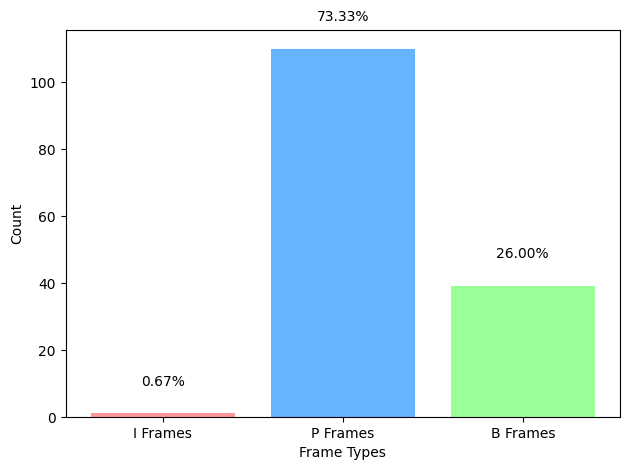

In [4]:
import matplotlib.pyplot as plt

labels = ['I Frames', 'P Frames', 'B Frames']
counts = [i_frame_count, p_frame_count, b_frame_count]
fig, ax = plt.subplots()
ax.bar(labels, counts, color=['#ff9999', '#66b3ff', '#99ff99'])
for i, count in enumerate(counts):
    ax.text(i, count + 0.05 * total_frame_count, f'{(count / total_frame_count) * 100:.2f}%', 
            ha='center', va='bottom')
ax.set_xlabel('Frame Types')
ax.set_ylabel('Count')
print('Distribution of Frame Types in Histogram')
plt.tight_layout()
plt.show()

### o	Plot a pie chart or bar graph showing the distribution of frame types using matplotlib.

Distribution of Frame Types in Pie Chart


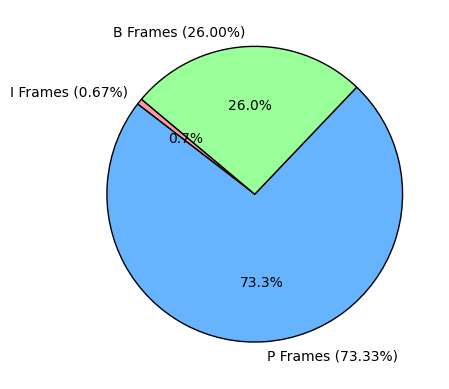

In [5]:
labels = [f'I Frames ({i_frame_percentage:.2f}%)', 
          f'P Frames ({p_frame_percentage:.2f}%)', 
          f'B Frames ({b_frame_percentage:.2f}%)']
sizes = [i_frame_count, p_frame_count, b_frame_count]
colors = ['#ff9999', '#66b3ff', '#99ff99']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
print('Distribution of Frame Types in Pie Chart')
plt.show()


# **Lab Task 3: Visualizing Frames**

# **Objective**:

## **Extract actual frames from the video and display them using Python.**

## Steps:

### **1.	Extract Frames:** 

### o	Use ffmpeg to extract individual I, P, and B frames from the video.

In [6]:
import os
import ffmpeg

def extract_frame_info(video_path, output_folder):
    i_frame_folder = os.path.join(output_folder, 'i')
    p_frame_folder = os.path.join(output_folder, 'p')
    b_frame_folder = os.path.join(output_folder, 'b')
    os.makedirs(i_frame_folder, exist_ok=True)
    os.makedirs(p_frame_folder, exist_ok=True)
    os.makedirs(b_frame_folder, exist_ok=True)
    (
        ffmpeg
        .input(video_path)
        .output(os.path.join(i_frame_folder, 'i_frame_%04d.png'), start_number=0, vf='select=\'eq(pict_type\\,I)\'')
        .run()
    )
    (
        ffmpeg
        .input(video_path)
        .output(os.path.join(p_frame_folder, 'p_frame_%04d.png'), start_number=0, vf='select=\'eq(pict_type\\,P)\'')
        .run()
    )
    (
        ffmpeg
        .input(video_path)
        .output(os.path.join(b_frame_folder, 'b_frame_%04d.png'), start_number=0, vf='select=\'eq(pict_type\\,B)\'')
        .run()
    )

### o	Save these frames as image files.

In [7]:
video_path = r'C:\Users\shank\OneDrive\Desktop\5.mp4'
output_folder = r'C:\Users\shank\SEMESTER - VII\images'
extract_frame_info(video_path, output_folder)

### **2.	Display Frames:** 

### o	Use a library like PIL (Pillow) or opencv-python to display the extracted frames.

### Displaying the extracted i_frames

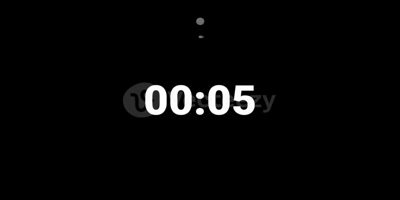

In [8]:
from PIL import Image
import os
from IPython.display import display

def display_images_from_folder(folder_path, size=(400, 200)):
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        with Image.open(img_path) as img:
            img = img.resize(size)
            display(img)
display_images_from_folder(r'C:\Users\shank\SEMESTER - VII\images\i', size=(400, 200))


### Displaying the extracted p_frames

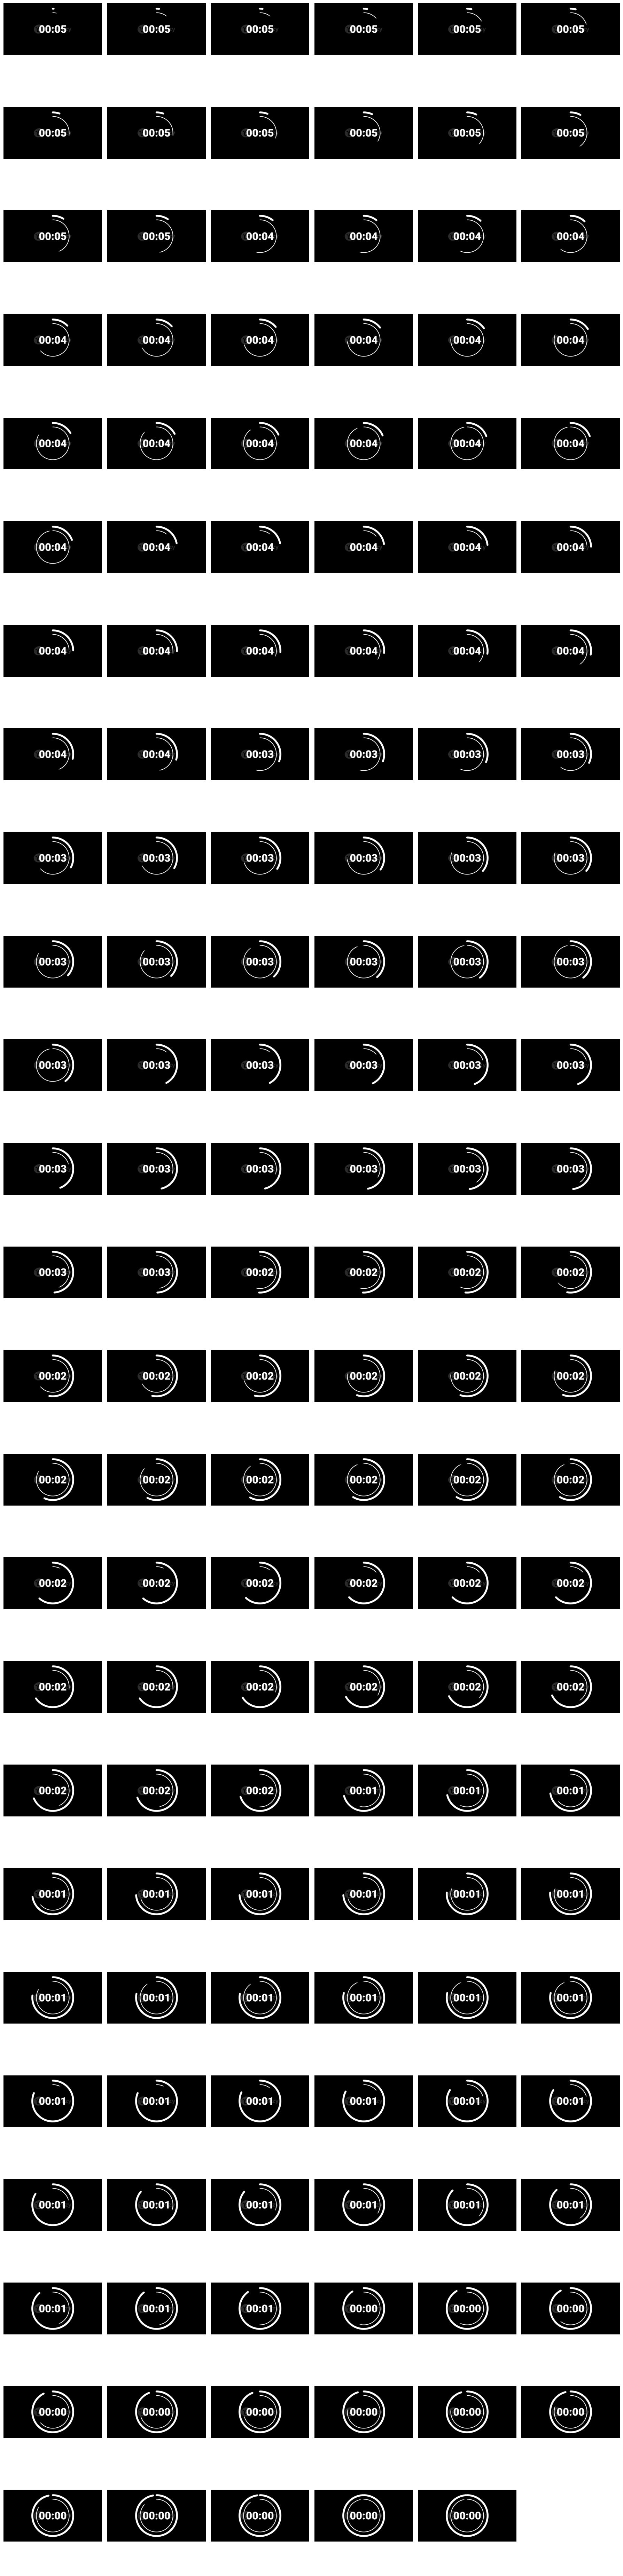

In [9]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

def display_images_from_folder(folder_path, grid_size=(6, 6), image_size=(3, 3)):
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.lower().endswith(('.png'))]
    num_images = len(image_paths)
    rows, cols = grid_size
    if num_images > rows * cols:
        rows = (num_images // cols) + (num_images % cols > 0)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * image_size[0], rows * image_size[1]))
    axes = axes.flatten() 
    for ax, img_path in zip(axes, image_paths):
        img = Image.open(img_path)
        ax.imshow(np.array(img))
        ax.axis('off') 
    for ax in axes[len(image_paths):]:
        ax.axis('off')
    plt.tight_layout()
    plt.show()
display_images_from_folder(r'C:\Users\shank\SEMESTER - VII\images\p', image_size=(3, 3))


### Displaying the extracted b_frames

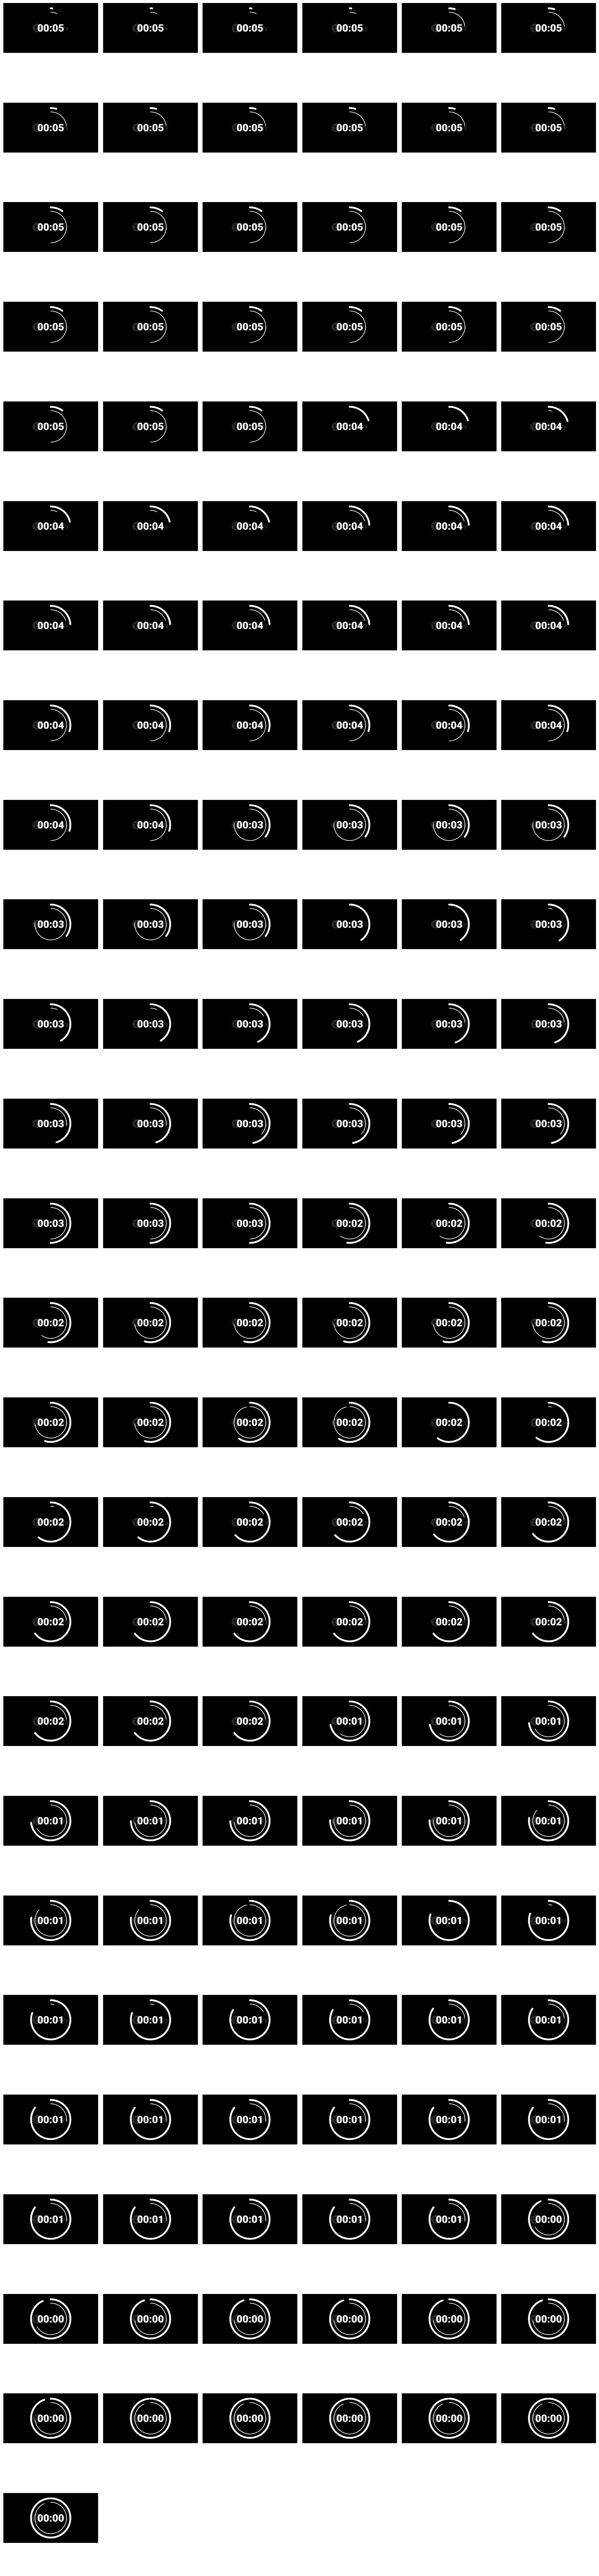

In [10]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

def display_images_from_folder(folder_path, grid_size=(6, 6), image_size=(3, 3)):
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.lower().endswith(('.png'))]
    num_images = len(image_paths)
    rows, cols = grid_size
    if num_images > rows * cols:
        rows = (num_images // cols) + (num_images % cols > 0)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * image_size[0], rows * image_size[1]))
    axes = axes.flatten() 
    for ax, img_path in zip(axes, image_paths):
        img = Image.open(img_path)
        ax.imshow(np.array(img))
        ax.axis('off') 
    for ax in axes[len(image_paths):]:
        ax.axis('off')
    plt.tight_layout()
    plt.show()
display_images_from_folder(r'C:\Users\shank\SEMESTER - VII\images\b', image_size=(3, 3))


### **3.	Compare the visual quality of I, P, and B frames.** 

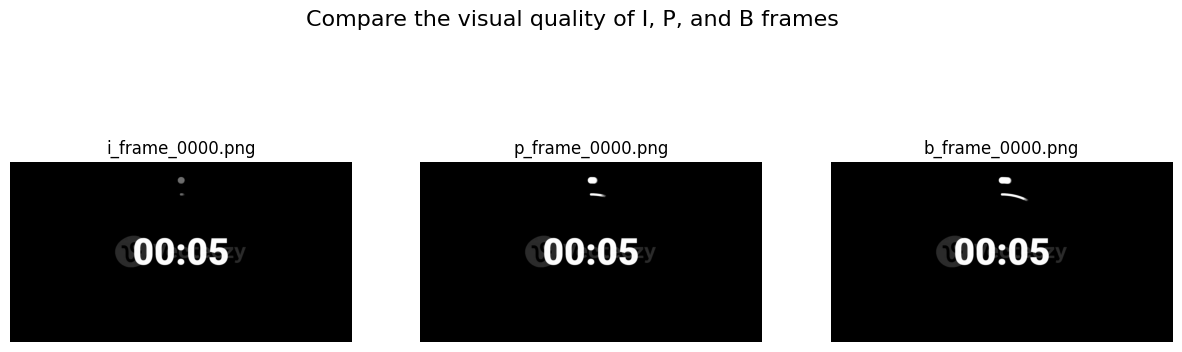

In [11]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def display_sample_images_with_titles(folder_paths):
    images = []
    image_names = []
    for folder in folder_paths:
        files = os.listdir(folder)
        image_path = os.path.join(folder, files[0])
        images.append(image_path)
        image_names.append(files[0])
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    if len(images) == 1:
        axes = [axes]
    for ax, image_path, image_name in zip(axes, images, image_names):
        img = Image.open(image_path)
        ax.imshow(img)
        ax.set_title(image_name, fontsize=12)
        ax.axis('off')
    plt.suptitle('Compare the visual quality of I, P, and B frames', fontsize=16)
    plt.show()
i_frame_folder = r'C:\Users\shank\SEMESTER - VII\images\i'
p_frame_folder = r'C:\Users\shank\SEMESTER - VII\images\p'
b_frame_folder = r'C:\Users\shank\SEMESTER - VII\images\b'
folder_paths = [i_frame_folder, p_frame_folder, b_frame_folder]
display_sample_images_with_titles(folder_paths)


# **Lab Task 4: Frame Compression Analysis**

# **Objective**:

## **Analyze the compression efficiency of I, P, and B frames.**

## Steps:

### **1.	Calculate Frame Sizes:** 

### o	Calculate the file sizes of extracted I, P, and B frames.

In [14]:
import os

def calculate_folder_sizes(folder_paths):
    folder_sizes = {}
    for folder in folder_paths:
        total_size = 0
        for file_name in os.listdir(folder):
            if file_name.endswith('.png'):
                file_path = os.path.join(folder, file_name)
                total_size += os.path.getsize(file_path)
        folder_sizes[folder] = total_size
    return folder_sizes
i_frame_folder = r'C:\Users\shank\SEMESTER - VII\images\i'
p_frame_folder = r'C:\Users\shank\SEMESTER - VII\images\p'
b_frame_folder = r'C:\Users\shank\SEMESTER - VII\images\b'
folder_paths = {
    'i_frames': i_frame_folder,
    'p_frames': p_frame_folder,
    'b_frames': b_frame_folder
}
folder_sizes = calculate_folder_sizes(folder_paths.values())
for label, folder in folder_paths.items():
    size = folder_sizes.get(folder, 0)
    print(f"File size of extracted {label.replace('_', ' ')} folder: {size / (1024 * 1024):.2f} MB")

File size of extracted i frames folder: 0.02 MB
File size of extracted p frames folder: 7.47 MB
File size of extracted b frames folder: 7.24 MB


### o	Compare the average file sizes of each frame type.

In [15]:
import os

def calculate_average_file_size(folder_paths):
    folder_averages = {}
    for folder in folder_paths:
        total_size = 0
        file_count = 0
        for file_name in os.listdir(folder):
            if file_name.endswith('.png'):
                file_path = os.path.join(folder, file_name)
                total_size += os.path.getsize(file_path)
                file_count += 1
        if file_count > 0:
            average_size = total_size / file_count
        else:
            average_size = 0
        folder_averages[folder] = average_size
    return folder_averages
i_frame_folder = r'C:\Users\shank\SEMESTER - VII\images\i'
p_frame_folder = r'C:\Users\shank\SEMESTER - VII\images\p'
b_frame_folder = r'C:\Users\shank\SEMESTER - VII\images\b'
folders = [i_frame_folder, p_frame_folder, b_frame_folder]
folder_averages = calculate_average_file_size(folders)
for folder in folders:
    average_size = folder_averages.get(folder, 0)
    folder_name = os.path.basename(folder) 
    print(f"Average File size in '{folder_name}' folder: {average_size / 1024:.2f} KB")


Average File size in 'i' folder: 24.00 KB
Average File size in 'p' folder: 51.31 KB
Average File size in 'b' folder: 49.12 KB


# **Lab Task 5: Advanced Frame Extraction**

# **Objective**:

## **Extract frames from a video and reconstruct a part of the video using only I frames.**

## Steps:

### **1.	Extract and Save I Frames:** 

### o	Extract I frames from the video and save them as separate image files.

In [1]:
import os
import ffmpeg

def extract_frame_info(video_path, output_folder):
    i_frame_folder = os.path.join(output_folder, 'newI')
    os.makedirs(i_frame_folder, exist_ok=True)
    (
        ffmpeg
        .input(video_path)
        .output(os.path.join(i_frame_folder, 'I_frame_%04d.png'), start_number=0, vf='select=\'eq(pict_type\\,I)\'')
        .run()
    )
video_path = r'C:\Users\shank\OneDrive\Desktop\12.mp4'
output_folder = r'C:\Users\shank\SEMESTER - VII\images'
extract_frame_info(video_path, output_folder)

### **2.	Reconstruct Video:** 

### o	Use the extracted I frames to reconstruct a portion of the video.

In [2]:
import os

frames_folder = r'C:\Users\shank\SEMESTER - VII\images\newI'
frames_list_file = 'frames.txt'
frames = sorted(f for f in os.listdir(frames_folder) if f.endswith('.png'))
with open(frames_list_file, 'w') as f:
    for frame in frames:
        f.write(f"file '{os.path.join(frames_folder, frame)}'\n")


In [4]:
import subprocess
output_video = 'output_video.mp4'
command = [
    'ffmpeg',
    '-f', 'concat',
    '-safe', '0',
    '-i', frames_list_file,
    '-vsync', 'vfr',
    output_video
]
subprocess.run(command, check=True)


CompletedProcess(args=['ffmpeg', '-f', 'concat', '-safe', '0', '-i', 'frames.txt', '-vsync', 'vfr', 'output_video.mp4'], returncode=0)

### o	Create a new video using these I frames with a reduced frame rate.

In [9]:
import subprocess
import os

i_frames_dir = r'C:\Users\shank\SEMESTER - VII\images\newI'

def reconstruct_video_from_i_frames(i_frames_dir, output_video_path, frame_rate=1):
    try:
        cmd = [
            'ffmpeg',
            '-framerate', str(frame_rate),
            '-i', os.path.join(i_frames_dir, 'frame_%04d.png'),
            '-c:v', 'libx264',
            '-pix_fmt', 'yuv420p',
            output_video_path
        ]
        print("FFmpeg command:", ' '.join(cmd))
        result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        print("FFmpeg Output:", result.stdout)
        print("FFmpeg Error Output:", result.stderr)
        if result.returncode == 0:
            print(f"Video reconstructed successfully and saved to {output_video_path}")
        else:
            print(f"Error reconstructing video: FFmpeg returned non-zero exit code {result.returncode}")
    except Exception as e:
        print(f"Exception occurred: {str(e)}")

output_video_path = 'reconstruct_video.mp4'
reconstruct_video_from_i_frames(i_frames_dir, output_video_path, frame_rate=1)


FFmpeg command: ffmpeg -framerate 1 -i C:\Users\shank\SEMESTER - VII\images\newI\frame_%04d.png -c:v libx264 -pix_fmt yuv420p reconstruct_video.mp4
FFmpeg Output: 
FFmpeg Error Output: ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with clang version 18.1.6
  configuration: --prefix=/d/bld/ffmpeg_1716729588356/_h_env/Library --cc=clang.exe --cxx=clang++.exe --nm=llvm-nm --ar=llvm-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --ld=lld-link --target-os=win64 --enable-cross-compile --toolchain=msvc --host-cc=clang.exe --extra-libs=ucrt.lib --extra-libs=vcruntime.lib --extra-libs=oldnames.lib --strip=llvm-strip --disable-stripping --host-extralibs= --disable-libopenvino --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-ve